# Task 2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import seaborn as sns
sns.set_theme(style="darkgrid")

## 1. Develop yourself using numpy library

### a) a function to implement gradient descent (GD) algorithm 


We will calculate partial derivatives numerically so that the algorithm is universal for any function

In [2]:
def partial_derivative(func, var=0, point=[]):
    args = point[:]

    def wraps(x):
        args[var] = x
        return f(*args)
    return scipy.misc.derivative(wraps, point[var], dx = 1e-3)


# gradient vector [df/dx, df/dy]
def grad_vector(x, y):
    x_der = lambda x, y: partial_derivative(f, 0, [x, y])
    y_der = lambda x, y: partial_derivative(f, 1, [x, y])
    return np.array([x_der(x, y), y_der(x, y)])

# grad descent for 2 variables with np array
def grad_descent_mult(x_prev, learn_rate):
    eps = 1e-4
    grad_itter = 1
    
    seq_x = []
    seq_y = []

    x_next = np.subtract(x_prev, learn_rate * grad_vector(x_prev[0], x_prev[1]))
    seq_x = np.append(seq_x, x_next[0])
    seq_y = np.append(seq_y, x_next[1])
    
    while np.linalg.norm(np.subtract(x_next, x_prev)) > eps and grad_itter < 1000:  
        x_prev = x_next
        x_next = x_prev - learn_rate * grad_vector(x_prev[0], x_prev[1])
        grad_itter += 1
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
    
    return (x_next, grad_itter, seq_x, seq_y)

# will allow us to see how the minimum point moved from iteration to iteration
def contour_plot(x_seq, y_seq, x1, X, Y, Z):
    plt.figure(1)
    CS = plt.contour(X, Y, Z, cmap=cm.RdBu)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.plot(x1[0], x1[1], 'ro')
    
    plt.plot(x_seq, y_seq, 'ro')
    plt.show()

### b) Adam's optimization algorithm for a function of two variables f(x,y).

Adam  (Adaptive momentum algorithm) combines momentum and RMSprop approaches:

- computes adaptive learning rates;
- storing an exponentially moving average of past squared gradients

and uses scaling of the gradients:

$${V_t^{corr}}= \frac{V_t}{1 - \beta^t}$$

Parameters:
- learning rate $\eta$
- $\beta_1$
- $\beta_2$
- $\epsilon$

The moving averages of past and past squared gradients $V_t$ and $S_t$ respectively are computed as follows:

$$V_t = \beta_1 V_{t-1} + (1 - \beta_1)g_t$$
$$S_t = \beta_2 S_{t-1} + (1 - \beta_2)g^2_t$$

Adam update rule for the model weights:

$$\theta_{t+1} = \theta_t - \frac{\eta}{\sqrt{{S_t^{corr}}} + \epsilon}{V_t}$$

Suggested values for $\beta_1$ is 0.9, for $\beta_2$ is 0.999 and $10^{-8}$ for $\epsilon$.

In [3]:
# Adaptive Moment Estimation for 2 variables
def adam(x_prev, learn_rate = 1e-2, beta1 = 0.9, beta2 = 0.999, eps = 1e-8):
    vt = np.zeros(x_prev.shape[0])
    st = np.zeros(x_prev.shape[0])
    seq_x = []
    seq_y = []
    counter = 0
    point_stop = eps + 1
    while point_stop > 1e-4 and counter < 1000:    
        gradients = grad_vector(x_prev[0], x_prev[1])
        vt = beta1 * vt + (1. - beta1) * gradients
        st = beta2 * st + (1. - beta2) * gradients ** 2

        vt_hat = vt / (1. - beta1 ** (counter + 1))
        st_hat = st / (1. - beta2 ** (counter + 1))

        x_next = x_prev - (learn_rate / (np.sqrt(st_hat) + eps)) * vt_hat
        
        point_stop = np.linalg.norm(np.subtract(x_next, x_prev))
        x_prev = x_next
        seq_x = np.append(seq_x, x_next[0])
        seq_y = np.append(seq_y, x_next[1])
        counter += 1
    return (x_next, counter, seq_x, seq_y)

## 2. Come up with a function of two variables of an arbitrary form and implement the search for its minimum using those implemented in p.1 functions - a) and b).



__Objective function__:
$$f(x,y)=\left(1.5 - x \cdot \left(1 - y\right)\right) ^ 2 + \left(2.25 - x \cdot \left(1 - y ^ 2\right)\right) ^ 2$$
__Partial derivatives__:

$$\frac{df(x)}{dx} = f_{x} = 2 \cdot (1.5 - x \cdot (1 - y)) \cdot (y - 1) + 2 \cdot \left(2.25 - x \cdot \left(1 - y ^ 2\right)\right) \cdot \left(y ^ 2 - 1\right)$$

$$\frac{df(y)}{dy} = f_{y} = 2 \cdot (1.5 - x \cdot (1 - y)) \cdot (-x) + 4xy \cdot \left(2.25 - x \cdot \left(1 - y ^ 2\right)\right)$$ 


__Global minimum__ of $f(x,y)$ is $(3,0.5)$ since $f(3,0.5) = 0$ and $f(x,y) \ge 0.$



I chose a function that I used a few years ago on the subject of optimization methods

In [4]:
# function
def f(x, y):
    return (1.5 - x * (1 - y)) ** 2 + (2.25 - x * (1 - y ** 2)) ** 2

I gave analytical partial derivatives for the gradient, but I will use the numerical finding

In [5]:
# analytical deritivate (not used)
def f_dx(x, y):
    return 2 * (1.5 - x * (1 - y)) * (y - 1) + 2 * (2.25 - x * (1 - y ** 2)) * (y ** 2 - 1)

def f_dy(x, y):
    return 2 * (1.5 - x * (1 - y)) * (-x) + 4 * x * y * (2.25 - x * (1 - y ** 2))

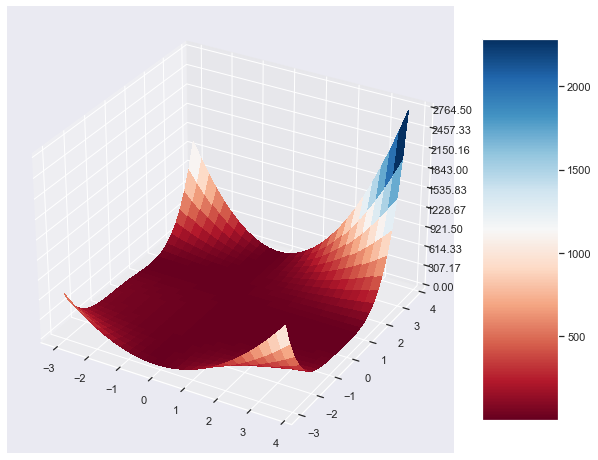

In [6]:
x = np.arange(-3, 4, 0.25)
y = np.arange(-3, 4, 0.25)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10, 10))

surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu, linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)
plt.show()

### Gradient descent

Minimum (x, y) from gradient descent: (2.969, 0.493)
Number of gradient descent iterations: 815


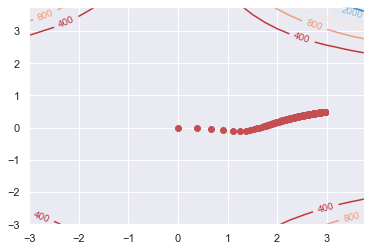

In [7]:
x0 = np.zeros(2)
grad_output = grad_descent_mult(x0, 0.05)

print(f"Minimum (x, y) from gradient descent: ({grad_output[0][0]:.3f}, {grad_output[0][1]:.3f})")
print(f"Number of gradient descent iterations: {grad_output[1]}")

contour_plot(grad_output[2], grad_output[3], x0, X=X, Y=Y, Z=Z)

### Adam

Minimum (x, y) from adam: (2.990, 0.498)
Number of adam iterations: 551


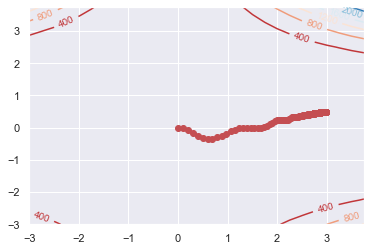

In [8]:
x0 = np.zeros(2)
adam_output = adam(x0, learn_rate=0.1) 
print(f"Minimum (x, y) from adam: ({adam_output[0][0]:.3f}, {adam_output[0][1]:.3f})")
print(f"Number of adam iterations: {adam_output[1]}")
contour_plot(adam_output[2], adam_output[3], x0, X=X, Y=Y, Z=Z)

With the same accuracy 1e-4, Adam algorithm converges faster and gives a more accurate result

## 3. Illustrate the process of finding an extremum in the form of a graph of the dependence of the value of the difference between two successive approximations of the solution (x_next – x_prev) on the iteration number N.

In [9]:
def show_gradient_process(output, title):
    iterations = np.arange(1, output[1])
    z_value = np.array([f(output[2][i], output[3][i]) for i in range(output[1])])
    diff_value = np.diff(z_value) # * (-1)
    plt.plot(iterations, diff_value)
    plt.title(title)
    plt.xlabel("Iteration")
    plt.ylabel("x_next - x_prev")
#     plt.yscale('log')
    plt.show()

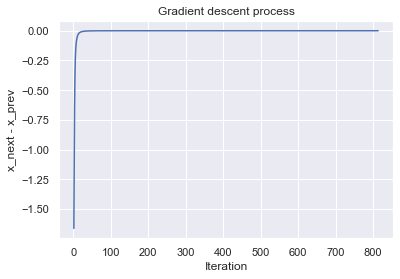

In [10]:
show_gradient_process(grad_output, "Gradient descent process")

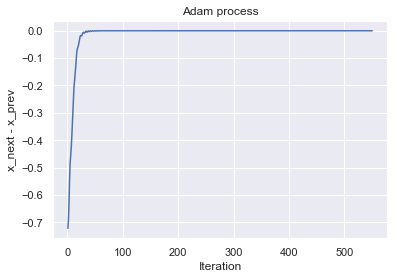

In [11]:
show_gradient_process(adam_output, "Adam process")

The graphs show that at the first iterations, gradient descent quickly tends to 0, and adam takes longer, but as a result, adam gives a better result. Also, since I tried to take a logarithm scale, it was clear that the difference in the results of adam was not only negative, but also positive